<a href="https://colab.research.google.com/github/nguyenbac5299/DataScience/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

#Features

In [3]:
# Import trainning and validation sets
!unzip '/content/drive/MyDrive/ColabNotebooks/sources/DataScience/Data/data/bluebook-for-bulldozers.zip' -d '/content/'

Archive:  /content/drive/MyDrive/ColabNotebooks/sources/DataScience/Data/data/bluebook-for-bulldozers.zip
   creating: /content/bluebook-for-bulldozers/
  inflating: /content/__MACOSX/._bluebook-for-bulldozers  
  inflating: /content/bluebook-for-bulldozers/random_forest_benchmark_test.csv  
  inflating: /content/__MACOSX/bluebook-for-bulldozers/._random_forest_benchmark_test.csv  
  inflating: /content/bluebook-for-bulldozers/Valid.csv  
  inflating: /content/__MACOSX/bluebook-for-bulldozers/._Valid.csv  
  inflating: /content/bluebook-for-bulldozers/median_benchmark.csv  
  inflating: /content/__MACOSX/bluebook-for-bulldozers/._median_benchmark.csv  
  inflating: /content/bluebook-for-bulldozers/Valid.zip  
  inflating: /content/__MACOSX/bluebook-for-bulldozers/._Valid.zip  
  inflating: /content/bluebook-for-bulldozers/TrainAndValid.7z  
  inflating: /content/__MACOSX/bluebook-for-bulldozers/._TrainAndValid.7z  
  inflating: /content/bluebook-for-bulldozers/Test.csv  
  inflating: /

In [4]:
df= pd.read_csv('/content/bluebook-for-bulldozers/TrainAndValid.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

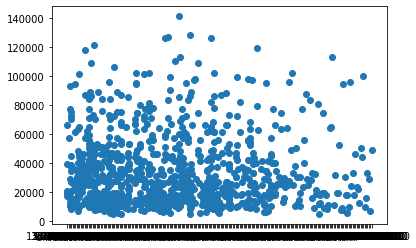

In [8]:
fig, ax= plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [9]:
df.saledate[:10]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
5    12/18/2008 0:00
6     8/26/2004 0:00
7    11/17/2005 0:00
8     8/27/2009 0:00
9      8/9/2007 0:00
Name: saledate, dtype: object

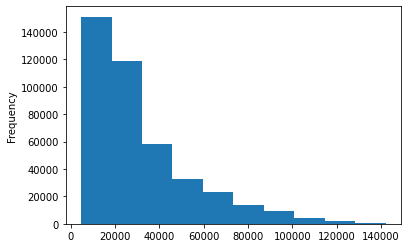

In [10]:
df.SalePrice.plot.hist()

##Parsing dates

In [11]:
df= pd.read_csv('/content/bluebook-for-bulldozers/TrainAndValid.csv', parse_dates=['saledate'])
df.saledate.dtype

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


dtype('<M8[ns]')

In [12]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

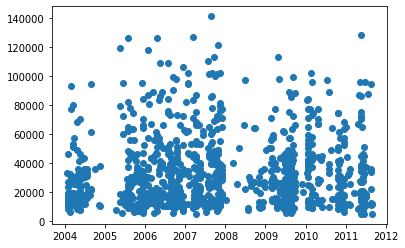

In [13]:
fig, ax= plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000]);

##Sort DataFrame by saledate

In [14]:
#when working with time series data, it's a good idea to sort it by date

# Sort dataframe in date order
df.sort_values(by=['saledate'], inplace= True, ascending= True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

##Make a copy of the original DataFrame

In [15]:
df_tmp= df.copy()

##Add datetime parameter for saledate column

In [16]:
df_tmp['saleYear']= df_tmp.saledate.dt.year
df_tmp['saleMonth']= df_tmp.saledate.dt.month
df_tmp['day']= df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek']= df_tmp.saledate.dt.day_of_week
df_tmp['saleDayOfYear']= df_tmp.saledate.dt.day_of_year

In [17]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [18]:
df_tmp.drop('saledate', axis=1, inplace=True)

In [19]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# Modelling

In [20]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

In [21]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

##Convert string to categories

In [22]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

True

In [23]:
df_tmp.items()

<generator object DataFrame.items at 0x7f640cdbfc10>

In [24]:
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [25]:
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype('category').cat.as_ordered()

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [27]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [28]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [29]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


##Save preprocessed data

In [30]:
# export current tmp data frame
df_tmp.to_csv('/content/bluebook-for-bulldozers/train_tmp.csv')

##Fill missing values

###Fill numerical missing values first

In [31]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [32]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add binary column to indicate whether sample had missing value
      df_tmp[label+'_is_missing']= pd.isnull(content)
      df_tmp[label]= content.fillna(content.median())

In [33]:
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [34]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

###Filling and turning categorical variables into numbers

In [35]:
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [36]:
pd.Categorical(df_tmp.state).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=True)

In [37]:
pd.Categorical(df_tmp.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [38]:
pd.Categorical(df_tmp.UsageBand).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [39]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add binary column to indicate whether sample has missing data
    df_tmp[label+'_is_missing']= pd.isnull(content)
    df_tmp[label]= pd.Categorical(content).codes +1

In [40]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(5), int64(10), int8(39)
memory usage: 81.5 MB


In [41]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


### test model with full data

In [42]:
%%time
# Instantiate model
model= RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fit the model
model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])


CPU times: user 23min 22s, sys: 6.35 s, total: 23min 29s
Wall time: 14min 13s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [43]:
model.score(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

0.9875495040871494

##Split data into train/validation sets

In [44]:
df_tmp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [45]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [46]:
df_val= df_tmp[df_tmp.saleYear==2012]
df_train= df_tmp[df_tmp.saleYear!= 2012]
len(df_val), len(df_train)

(11573, 401125)

In [47]:
# Split data into X, y

X_train, y_train= df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_val, y_val= df_val.drop('SalePrice', axis=1), df_val['SalePrice']

len(X_train), len(y_train), len(X_val), len(y_val)

(401125, 401125, 11573, 11573)

##Building a evaluation function

In [48]:

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle (y_test, y_preds):
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_score(model):
  train_preds= model.predict(X_train)
  val_preds= model.predict(X_val)
  score={'Training MAE': mean_absolute_error(y_train, train_preds),
         'valid MAE': mean_absolute_error(y_val, val_preds),
         'Training RMSLE': rmsle(y_train, train_preds),
         'Valid RMSLE': rmsle(y_val, val_preds),
         'Training R^2': r2_score(y_train, train_preds),
         'Valid R^2': r2_score(y_val, val_preds)}
  return score

##Testing our model on a subset (to tune the hyperparameters)

In [49]:
from sklearn.ensemble import RandomForestRegressor
# Change max_samples value
model= RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples= 10000)

In [50]:
%%time
# Cutting down on the max number of samples 
model.fit(X_train, y_train)

CPU times: user 48.9 s, sys: 854 ms, total: 49.8 s
Wall time: 32 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [51]:
train_preds= model.predict(X_train)
val_preds= model.predict(X_val)

In [52]:
mean_absolute_error(y_train, train_preds)

5561.396858734807

In [53]:
rmsle(y_train, train_preds)

0.2577477569876176

In [54]:
mean_absolute_error(y_val, val_preds)

7181.745755638123

In [55]:
rmsle(y_val, val_preds)

0.293595185306081

In [56]:
show_score(model)

{'Training MAE': 5561.396858734807,
 'valid MAE': 7181.745755638123,
 'Training RMSLE': 0.2577477569876176,
 'Valid RMSLE': 0.293595185306081,
 'Training R^2': 0.8607116981822567,
 'Valid R^2': 0.8316902392066935}

##Hyperparameter tuning with RandomizedSearCV

In [57]:
model._get_param_names()

['bootstrap',
 'ccp_alpha',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [58]:
from sklearn.model_selection import RandomizedSearchCV
# Different RandomForestRegressor hyperparameter
rf_grid={'n_estimators': np.arange(10, 100, 10),
         'max_depth': [None, 10, 100, 1000],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2),
         'max_features':[1,'sqrt','auto'],
         'max_samples':[10000]}

rs_model= RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=rf_grid,
                             n_iter=3,
                             cv=5,
                             verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'max_depth': [None, 10, 100, 1000],
                                        'max_features': [1, 'sqrt', 'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [59]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 14,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 100}

In [60]:
# Evaluate the RandomizedSearch model
show_score(rs_model)

{'Training MAE': 6532.081436250984,
 'valid MAE': 8100.693663853731,
 'Training RMSLE': 0.29289282212672924,
 'Valid RMSLE': 0.3216069019619444,
 'Training R^2': 0.8078529076453902,
 'Valid R^2': 0.7777029678960614}

##Train a model with the best hyperparameters

In [61]:
%%time
#Most ideal hyperparameter
ideal_model= RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)
#Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 4min 15s, sys: 1.18 s, total: 4min 16s
Wall time: 2min 35s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [62]:
show_score(ideal_model)

{'Training MAE': 2946.8483786146953,
 'valid MAE': 5963.098428944584,
 'Training RMSLE': 0.14446831828269255,
 'Valid RMSLE': 0.24551978575488667,
 'Training R^2': 0.9589267192100979,
 'Valid R^2': 0.8816029704165416}

#Make predictions on test data

In [63]:
# Import test dataset
df_test= pd.read_csv('/content/bluebook-for-bulldozers/Test.csv', parse_dates=['saledate'])

In [64]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [65]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [66]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

##Preprocessing the data(getting the test dataset in the same format as our training dataset)

In [67]:
def preprocess_data(df):
  df['saleYear']= df.saledate.dt.year
  df['saleMonth']= df.saledate.dt.month
  df['day']= df.saledate.dt.day
  df['saleDayOfWeek']= df.saledate.dt.day_of_week
  df['saleDayOfYear']= df.saledate.dt.day_of_year

  df.drop('saledate', axis=1, inplace=True)
  #Fill the numeric rows with median
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        df[label+'_is_missing']= pd.isnull(content)
        df[label]= content.fillna(content.median())

    # Fill categorical missing data
    if not pd.api.types.is_numeric_dtype(content):
      df[label+'_is_missing']= pd.isnull(content)
      df[label]= pd.Categorical(content).codes+1

  return df

In [68]:
df_test= preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [69]:
# We cant find how the columns differ using sets

set(X_train.columns)- set(df_test.columns)

{'auctioneerID_is_missing'}

In [70]:
# manually adjust df_test to have auctioneerID_is_missing
df_test['auctioneerID_is_missing']= False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [71]:
# make prediction on test data
test_preds= ideal_model.predict(df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [72]:
test_preds

array([23656.03479596, 24735.17942629, 52467.10220894, ...,
       13859.18614045, 23198.02467855, 33025.3789073 ])

In [73]:
df_preds= pd.DataFrame()
df_preds['SalesID']= df_test['SalesID']
df_preds['SalePrice']= test_preds
df_preds

,SalesID,SalePrice
0,1227829,23656.034796
1,1227844,24735.179426
2,1227847,52467.102209
3,1227848,70904.998988
4,1227863,46987.436956
...,...,...
12452,6643171,48914.577754
12453,6643173,16994.742130
12454,6643184,13859.186140
12455,6643186,23198.024679


In [74]:
df_preds.to_csv('/content/test_predictions.csv')

#Feature Importance

In [75]:
# Find feature importance of best model
ideal_model.feature_importances_

array([3.29131508e-02, 1.78694060e-02, 3.98175951e-02, 1.60089049e-03,
       3.32361489e-03, 2.11617049e-01, 3.04786604e-03, 1.10733567e-03,
       4.32503106e-02, 4.56990418e-02, 6.22889932e-02, 4.34317385e-03,
       1.65752885e-02, 1.60314314e-01, 4.65032343e-02, 5.93425591e-03,
       1.14472630e-03, 2.22435822e-03, 2.78359195e-03, 5.18763735e-02,
       7.01285229e-04, 2.90008444e-05, 1.19616398e-03, 2.00581261e-04,
       1.17495045e-03, 2.44139914e-05, 2.05122188e-03, 6.20253008e-03,
       1.81542137e-04, 2.45889054e-03, 4.97815647e-03, 3.63259113e-03,
       2.92046478e-03, 5.02320953e-04, 2.86187520e-04, 6.36143085e-03,
       8.53222997e-04, 1.70651334e-02, 8.19522223e-04, 1.79816634e-03,
       4.97226236e-04, 8.11181537e-04, 2.54577285e-03, 5.78885988e-04,
       7.09402933e-04, 3.60972051e-04, 2.46047689e-04, 1.63958848e-03,
       8.56525102e-04, 2.86465653e-04, 3.40985374e-04, 7.41179618e-02,
       3.77158269e-03, 5.60599490e-03, 2.92541561e-03, 9.86812881e-03,
      

In [76]:
def plot_feature(columns, importance, n=20):
  df= (pd.DataFrame({'feature': columns,
                     'feature_importance': importance})
  .sort_values('feature_importance', ascending=False)
  .reset_index(drop=True))

  # Plot the dataframe
  fig, ax= plt.subplots()
  ax.barh(df['feature'][:n], df['feature_importance'][:n])
  ax.set_ylabel('feature')
  ax.set_xlabel('feature importance')
  ax.invert_yaxis()

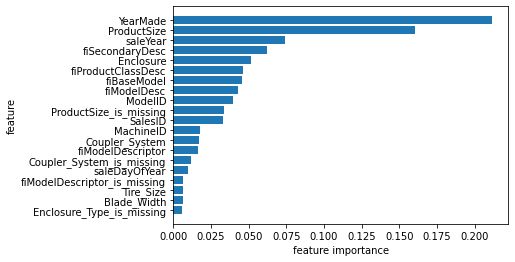

In [77]:
plot_feature(X_train.columns, ideal_model.feature_importances_)